In [13]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re

In [14]:
# Read in the data
dfconc = pd.read_csv(r'C:\Users\crae1\Documents\GWG\NFL Concussion\NFL_concussion\concussionNFL.csv')

In [15]:
# Search for missing data
def missing_data_search():
    for col in dfconc.columns:
        percentage_missing = np.mean(dfconc[col].isnull())
        print('{} - {}%'.format(col, percentage_missing))
missing_data_search()

ID - 0.0%
Player - 0.0%
Team - 0.0%
Game - 0.0%
Date - 0.0%
Opposing Team - 0.0%
Position - 0.0%
Pre-Season Injury? - 0.0%
Winning Team? - 0.0%
Week of Injury - 0.0%
Season - 0.0%
Weeks Injured - 0.0%
Games Missed - 0.07908163265306123%
Unknown Injury? - 0.0%
Reported Injury Type - 0.007653061224489796%
Total Snaps - 0.0%
Play Time After Injury - 0.1096938775510204%
Average Playtime Before Injury - 0.13010204081632654%


In [16]:
# Drop rows with incomplete data
dfconc = dfconc[dfconc['Reported Injury Type'].notna()]
dfconc = dfconc[dfconc['Games Missed'].notna()]
dfconc = dfconc[dfconc['Play Time After Injury'].notna()]
dfconc = dfconc[dfconc['Average Playtime Before Injury'].notna()]

missing_data_search()


ID - 0.0%
Player - 0.0%
Team - 0.0%
Game - 0.0%
Date - 0.0%
Opposing Team - 0.0%
Position - 0.0%
Pre-Season Injury? - 0.0%
Winning Team? - 0.0%
Week of Injury - 0.0%
Season - 0.0%
Weeks Injured - 0.0%
Games Missed - 0.0%
Unknown Injury? - 0.0%
Reported Injury Type - 0.0%
Total Snaps - 0.0%
Play Time After Injury - 0.0%
Average Playtime Before Injury - 0.0%


In [17]:
# Filter data only for players that suffered a concussion
dfconc = dfconc[dfconc['Reported Injury Type'] == 'Concussion']


In [18]:
# List all positions in df
print(dfconc.Position.unique())

['Offensive Tackle' 'Wide Receiver' 'Guard' 'Defensive End' 'Tight End'
 'Running Back' 'Center' 'Safety' 'Comerback' 'Linebacker'
 'Defensive Tackle' 'Quarterback' 'Full Back']


In [19]:
# Replace position names with abbreviations
dfconc = dfconc.replace('Wide Receiver', 'WR')
dfconc = dfconc.replace('Offensive Tackle', 'OT')
dfconc = dfconc.replace('Center', 'C')
dfconc = dfconc.replace('Guard', 'OG')
dfconc = dfconc.replace('Tight End', 'TE')
dfconc = dfconc.replace('Defensive End', 'DE')
dfconc = dfconc.replace('Running Back', 'RB')
dfconc = dfconc.replace('Safety', 'S')
dfconc = dfconc.replace('Comerback', 'CB')
dfconc = dfconc.replace('Linebacker', 'LB')
dfconc = dfconc.replace('Defensive Tackle', 'DT')
dfconc = dfconc.replace('Quarterback', 'QB')
dfconc = dfconc.replace('Full Back', 'FB')


In [20]:
# Change dtypes of play time columns and rename them, 'Did not return from injury' now has a value of 1000
dfconc['Play Time After Injury'] = dfconc['Play Time After Injury'].str.replace(r'Did not return from injury', '1000')
dfconc['Play Time After Injury'] = dfconc['Play Time After Injury'].str.replace(r' downs', '').astype(int)
dfconc['Average Playtime Before Injury'] = dfconc['Average Playtime Before Injury'].str.replace(r' downs', '').astype(float)

In [21]:
dfconc.rename(columns={'Play Time After Injury' : 'downs_after_injury', 'Average Playtime Before Injury' : 'mean_downs_before_injury', 'Player' : 'nameFull'}, inplace=True, errors='raise')

In [22]:
# Read in the data
dfcomb = pd.read_csv(r'C:\Users\crae1\Documents\GWG\NFL Concussion\NFL_concussion\combine.csv')

In [23]:
# Search for missing data
def missing_data_search():
    for col in dfcomb.columns:
        percentage_missing = np.mean(dfcomb[col].isnull())
        print('{} - {}%'.format(col, percentage_missing))
missing_data_search()

combineId - 0.0%
playerId - 0.0%
combineYear - 0.0%
combinePosition - 0.0%
combineHeight - 0.0%
combineWeight - 0.0%
combineHand - 0.6436507936507937%
nameFirst - 0.0001984126984126984%
nameLast - 0.0001984126984126984%
nameFull - 0.0001984126984126984%
position - 0.00029761904761904765%
collegeId - 0.0001984126984126984%
nflId - 0.10783730158730159%
college - 0.0001984126984126984%
heightInches - 0.0006944444444444445%
weight - 0.0006944444444444445%
dob - 0.15763888888888888%
ageAtDraft - 0.15763888888888888%
playerProfileUrl - 0.10783730158730159%
homeCity - 0.25376984126984126%
homeState - 0.2685515873015873%
homeCountry - 0.24910714285714286%
highSchool - 0.5861111111111111%
hsCity - 0.7691468253968254%
hsState - 0.5875992063492064%
hsCountry - 0.5861111111111111%
combineArm - 0.6749007936507937%
combine40yd - 0.10496031746031746%
combineVert - 0.16061507936507938%
combineBench - 0.28888888888888886%
combineShuttle - 0.2573412698412698%
combineBroad - 0.17549603174603173%
combine3

In [24]:
# Drop rows with missing data
dfcomb = dfcomb[dfcomb['nameFirst'].notna()]
dfcomb = dfcomb[dfcomb['nameLast'].notna()]
dfcomb = dfcomb[dfcomb['nameFull'].notna()]
dfcomb = dfcomb[dfcomb['position'].notna()]
dfcomb = dfcomb[dfcomb['collegeId'].notna()]
dfcomb = dfcomb[dfcomb['nflId'].notna()]
dfcomb = dfcomb[dfcomb['college'].notna()]
dfcomb = dfcomb[dfcomb['heightInches'].notna()]
dfcomb = dfcomb[dfcomb['weight'].notna()]
dfcomb = dfcomb[dfcomb['dob'].notna()]
dfcomb = dfcomb[dfcomb['ageAtDraft'].notna()]

missing_data_search()

combineId - 0.0%
playerId - 0.0%
combineYear - 0.0%
combinePosition - 0.0%
combineHeight - 0.0%
combineWeight - 0.0%
combineHand - 0.6914642772930912%
nameFirst - 0.0%
nameLast - 0.0%
nameFull - 0.0%
position - 0.0%
collegeId - 0.0%
nflId - 0.0%
college - 0.0%
heightInches - 0.0%
weight - 0.0%
dob - 0.0%
ageAtDraft - 0.0%
playerProfileUrl - 0.0%
homeCity - 0.11483140768686631%
homeState - 0.13239801933506248%
homeCountry - 0.10929026173072388%
highSchool - 0.5095496345201603%
hsCity - 0.7265975005894836%
hsState - 0.5113180853572271%
hsCountry - 0.5095496345201603%
combineArm - 0.7184626267389767%
combine40yd - 0.09785427965102571%
combineVert - 0.15739212449893894%
combineBench - 0.2736382928554586%
combineShuttle - 0.25701485498703136%
combineBroad - 0.17201131808535722%
combine3cone - 0.4854987031360528%
combine60ydShuttle - 0.8519217165762791%
combineWonderlic - 0.9597972176373497%


In [25]:
# List all positions in df
print(dfcomb.position.unique())

['DB' 'C' 'WR' 'DT' 'RB' 'OT' 'TE' 'DE' 'LB' 'QB' 'OG' 'K' 'S' 'FB' 'OLB'
 'OL' 'P' 'DL' 'LS']


In [26]:
# Refactor position ids to match concussion.csv
dfcomb = dfcomb.replace('DB', 'CB')
dfcomb = dfcomb.replace('LS', 'C')
dfcomb = dfcomb.replace('OLB', 'LB')
dfcomb = dfcomb.replace('OL', 'OG')
dfcomb = dfcomb.replace('DL', 'DT')

In [27]:
# Create a merged df with players that are concussed on dfconc and players that are on dfcomb
dfcommon = dfcomb.merge(dfconc, on=['nameFull'])
dfcommon = pd.read_csv(r'C:\Users\crae1\Documents\GWG\NFL Concussion\NFL_concussion\common.csv')

dfcommon = dfcommon.sort_values(by='position', ascending=True)
dfcomb = dfcomb.sort_values(by='position', ascending=True)

In [28]:
# Initialise list of pos
positions = ['C', 'RB', 'CB', 'LB', 'OG', 'OT', 'QB', 'DT', 'S', 'FB', 'WR', 'TE']

# Remove K and P positions from dfcomb
dfcomb = dfcomb[dfcomb.position != 'K']
dfcomb = dfcomb[dfcomb.position != 'P']

In [29]:
# Iterate through list and compare height and weight 
for pos in positions:
    avgh = np.mean(dfcomb['heightInches'].where(dfcomb['position'] == pos))
    avgconch = np.mean(dfcommon['heightInches'].where(dfcommon['position'] == pos))
    avgw = np.mean(dfcomb['weight'].where(dfcomb['position'] == pos))
    avgconcw = np.mean(dfcommon['weight'].where(dfcommon['position'] == pos))
    print('mean weight in the NFL for {}s is {} lbs mean weight of concussed players {} lbs'.format(pos + '\'', avgw, avgconcw))
    print('mean height in the NFL for {}s is {} in mean height of concussed players {} in'.format(pos + '\'', avgh, avgconch))

mean weight in the NFL for C's is 297.1791666666667 lbs mean weight of concussed players 308.3333333333333 lbs
mean height in the NFL for C's is 75.38333333333334 in mean height of concussed players 76.33333333333333 in
mean weight in the NFL for RB's is 215.85765983112182 lbs mean weight of concussed players 220.8181818181818 lbs
mean height in the NFL for RB's is 70.92882991556091 in mean height of concussed players 71.04545454545455 in
mean weight in the NFL for CB's is 193.87487875848691 lbs mean weight of concussed players 196.63333333333333 lbs
mean height in the NFL for CB's is 71.33462657613967 in mean height of concussed players 71.6 in
mean weight in the NFL for LB's is 241.51003649635035 lbs mean weight of concussed players 245.41176470588235 lbs
mean height in the NFL for LB's is 73.89324817518248 in mean height of concussed players 74.05882352941177 in
mean weight in the NFL for OG's is 310.19669421487606 lbs mean weight of concussed players 314.3 lbs
mean height in the NF

In [30]:
# Create summary df for concussion and NFL groups
heightavgNFL = dfcomb.groupby('position')['heightInches'].mean
heightavgdf = dfcommon.groupby('position')['heightInches'].mean
weightavgNFL = dfcomb.groupby('position')['weight'].mean
weightavgdf = dfcommon.groupby('position')['weight'].mean


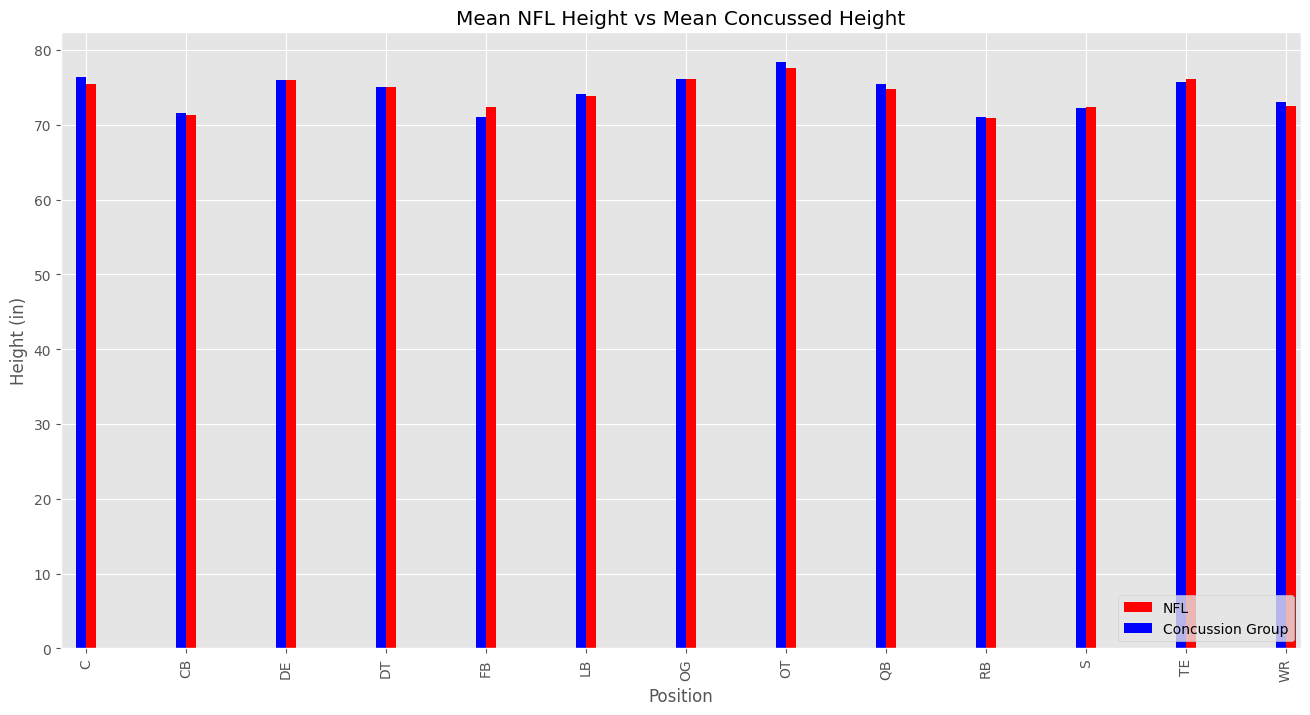

In [31]:
# Plot height
bar_width = 0.10
ax = heightavgNFL().plot(kind='bar', align='edge', title='Mean NFL Height vs Mean Concussed Height', ylabel='Height (in)', xlabel='Position', width=bar_width, figsize=(16,8), color='r',label='NFL')
heightavgdf().plot(kind='bar', ax=ax, align='edge', title='Mean NFL Height vs Mean Concussed Height', ylabel='Height (in)', xlabel='Position', width=-bar_width, figsize=(16,8), color='b',label='Concussion Group')
plt.legend(loc='lower right')

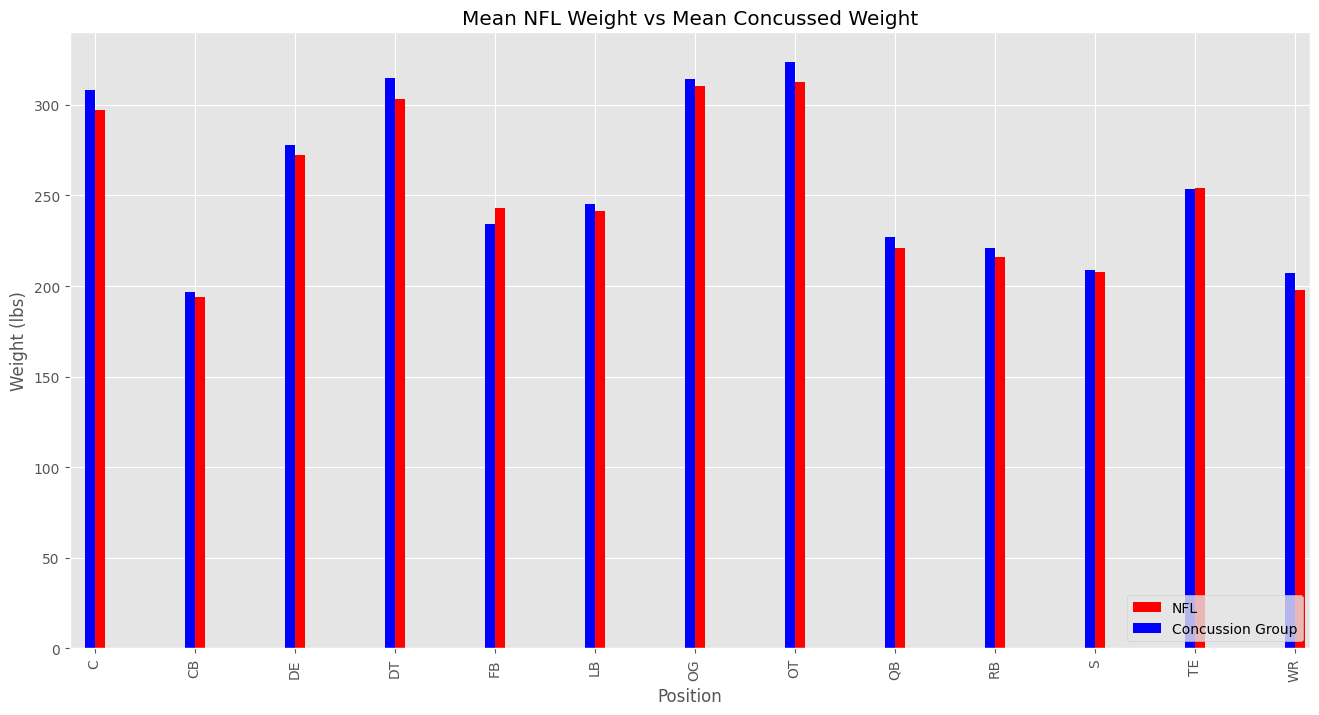

In [32]:
# Plot weight
bar_width = 0.10
ax = weightavgNFL().plot(kind='bar', align='edge', title='Mean NFL Weight vs Mean Concussed Weight', ylabel='Weight (lbs)', xlabel='Position', width=bar_width, figsize=(16,8), color='r',label='NFL')
weightavgdf().plot(kind='bar', ax=ax, align='edge', title='Mean NFL Weight vs Mean Concussed Weight', ylabel='Weight (lbs)', xlabel='Position', width=-bar_width, figsize=(16,8), color='b',label='Concussion Group')
plt.legend(loc='lower right')